## OptKnock
***
Next we will use cameo's optknock algorithm to try and find knockout strategies. 

In [5]:
%run model.ipynb
from cameo.strain_design import OptKnock
from cameo.visualization.plotting.with_plotly import PlotlyPlotter


'' is not a valid SBML 'SId'.


c:\Users\Lukas\anaconda3\lib\site-packages\cameo\strain_design\deterministic\linear_programming.py:118: UserWarning: You are trying to run OptKnock with glpk_interface. This might not end well.
  warnings.warn("You are trying to run OptKnock with %s. This might not end well." %



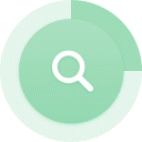

<IPython.core.display.Javascript object>

HBox()

,reactions,size,THCAS,biomass,fva_min,fva_max
0,"{r2002, r1010, r236, r136}",4,3.557348,-0.0,3.521774,3.557348


In [3]:
optknock = OptKnock(model, fraction_of_optimum=0.1)
result = optknock.run(max_knockouts=5, target="THCAS", biomass="DRAIN_Biomass")
result


In [8]:
model.reactions.r2002

Reaction identifier,r2002
Name,m-Cresol hydroxylase
Memory address,0x01e12b2acbb0
Stoichiometry,MCRE + NADPH + O2 --> H2O + NADP + TOLU m-Cresol + NADPH + Oxygen --> Water + NADP+ + Toluquinol
GPR,1107788
Lower bound,0.0
Upper bound,1000.0


In [10]:
model.reactions.r1010

Reaction identifier,r1010
Name,"Artificial reaction, chlor left out"
Memory address,0x01e12b2acc40
Stoichiometry,4.0 ACCOA + MALCOA + PHE --> 5.0 COA + OTA 4.0 Acetyl coenzyme A + Malonyl coenzyme A + L-Phenylalanine --> 5.0 Coenzyme A + Ochratoxin A
GPR,1123435
Lower bound,0.0
Upper bound,1000.0


In [12]:
model.reactions.r236

Reaction identifier,r236
Name,Inorganic diphosphatase
Memory address,0x01e12aebdb80
Stoichiometry,H2O + PPI --> 2.0 PI Water + Pyrophosphate --> 2.0 Orthophosphate
GPR,1136293
Lower bound,0.0
Upper bound,1000.0


In [13]:
model.reactions.r136

Reaction identifier,r136
Name,Glycerol dehydrogenase
Memory address,0x01e1281c16a0
Stoichiometry,E + NADPH <=> EOL + NADP D-Erythrose + NADPH <=> Erythritol + NADP+
GPR,1101910 or 1127368
Lower bound,-1000.0
Upper bound,1000.0


'' is not a valid SBML 'SId'.


{<Gene 1128503 at 0x1e130529af0>: 0.9398547241492334, <Gene 1145456 at 0x1e130529ca0>: 0.9398547241493491, <Gene 1155770 at 0x1e130529c40>: 0.9398547241493491, <Gene 1143538 at 0x1e130529b50>: 0.9398547241493491, <Gene 1146031 at 0x1e130529cd0>: 0.9256883175021038, <Gene 1126547 at 0x1e130529be0>: 0.9398547241492676, <Gene 1128684 at 0x1e130529bb0>: 0.9097997964718153, <Gene 1146884 at 0x1e130529b80>: 0.9398547241492193, <Gene 1145051 at 0x1e130529d00>: 0.9097997964716905, <Gene 1141976 at 0x1e130529d30>: 0.939854724149237, <Gene 1144773 at 0x1e130529d60>: 0.9398547241492604, <Gene 1145793 at 0x1e130529d90>: 0.8368898546966085, <Gene 1148178 at 0x1e130529dc0>: 0.836889854696603, <Gene 1145895 at 0x1e130529df0>: 0.9398547241491945, <Gene 1124768 at 0x1e130529e20>: 0.9398547241492703, <Gene 1183468 at 0x1e130529e50>: 0.9398547241492703, <Gene 1113563 at 0x1e130529e80>: 0.8569316227682299, <Gene 1184650 at 0x1e130529eb0>: 0.8576013494114453, <Gene 1031996 at 0x1e130529ee0>: 0.939854724149

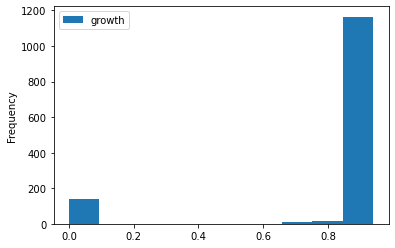

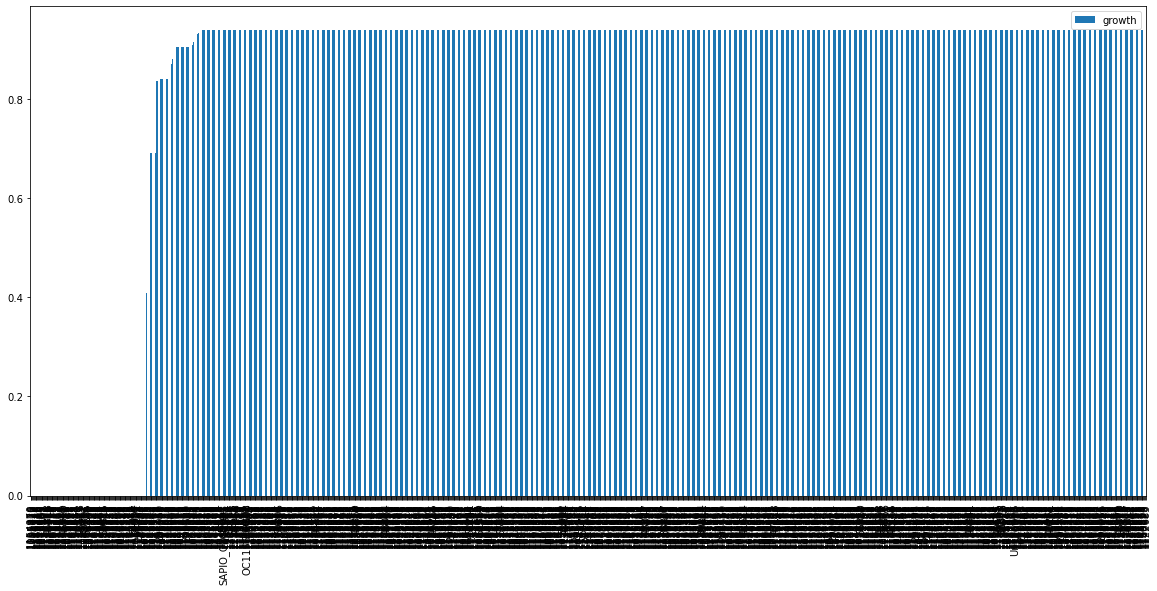

In [18]:
%run essential_genes.ipynb

In [19]:
essentiality

{<Gene 1128503 at 0x1e130529af0>: 0.9398547241492334,
 <Gene 1145456 at 0x1e130529ca0>: 0.9398547241493491,
 <Gene 1155770 at 0x1e130529c40>: 0.9398547241493491,
 <Gene 1143538 at 0x1e130529b50>: 0.9398547241493491,
 <Gene 1146031 at 0x1e130529cd0>: 0.9256883175021038,
 <Gene 1126547 at 0x1e130529be0>: 0.9398547241492676,
 <Gene 1128684 at 0x1e130529bb0>: 0.9097997964718153,
 <Gene 1146884 at 0x1e130529b80>: 0.9398547241492193,
 <Gene 1145051 at 0x1e130529d00>: 0.9097997964716905,
 <Gene 1141976 at 0x1e130529d30>: 0.939854724149237,
 <Gene 1144773 at 0x1e130529d60>: 0.9398547241492604,
 <Gene 1145793 at 0x1e130529d90>: 0.8368898546966085,
 <Gene 1148178 at 0x1e130529dc0>: 0.836889854696603,
 <Gene 1145895 at 0x1e130529df0>: 0.9398547241491945,
 <Gene 1124768 at 0x1e130529e20>: 0.9398547241492703,
 <Gene 1183468 at 0x1e130529e50>: 0.9398547241492703,
 <Gene 1113563 at 0x1e130529e80>: 0.8569316227682299,
 <Gene 1184650 at 0x1e130529eb0>: 0.8576013494114453,
 <Gene 1031996 at 0x1e130529ee

From the essential genes script we find that gene 1136293 is essential as without the gene there is no growth and gene 1101910 knockout will cause reduced growth. Thus only the following genes are eligible for knockout: 1123435,  1123435 and optionally 1101910. 

1123435 codes for m-Cresol hydroxylase which catalyzes the following reaction:

- m-Cresol + NADPH + Oxygen --> Water + NADP+ + Toluquinol

1123435 codes the enzyme that catalyzes the  following reaction:

- 4.0 Acetyl coenzyme A + Malonyl coenzyme A + L-Phenylalanine --> 5.0 Coenzyme A + Ochratoxin A

1101910 codes for Glycerol dehydrogenase which catalyzes the following reaction:

- E + NADPH <=> EOL + NADP

and

- D-Erythrose + NADPH <=> Erythritol + NADP+


malonyl-CoA is an important precursor in fatty acid biosynthesis and thus for the production of Olivetolic acid, which is used in the biosynthesis of THC (KEGG PATHWAY: Fatty Acid Biosynthesis - Aspergillus Niger (Black Aspergilli), n.d.). The m-cresol reaction is part of the toluene degradation pathway(KEGG PATHWAY: Toluene Degradation - Reference Pathway, n.d.). The reason why growth stops when knocking out the target genes is because of gene 1136293 which is essential for creating phostate (Pi), However if the medium is supplied with phosphate than the enzyme is no longer essential and thus the gene targets become a viable strategy . 

## References
***
KEGG PATHWAY: Fatty acid biosynthesis - Aspergillus niger (black aspergilli). (n.d.). https://www.kegg.jp/pathway/map=ang00061&keyword=malonyl-coa

KEGG PATHWAY: Toluene degradation - Reference pathway. (n.d.). https://www.kegg.jp/pathway/map=map00623&keyword=toluene